In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [2]:
dtypes = {
"duration": np.int8,
"protocol_type": np.object,
"service": np.object,
"flag": np.object,
"src_bytes":  np.int8,
"dst_bytes":  np.int8,
"land": np.int8,
"wrong_fragment":  np.int8,
"urgent": np.int8,
"hot": np.int8,
"m_failed_logins":  np.int8,
"logged_in":  np.int8,
"num_compromised":  np.int8,
"root_shell":  np.int8,
"su_attempted":  np.int8,
"num_root": np.int8,
"num_file_creations":  np.int8,
"num_shells":  np.int8,
"num_access_files":  np.int8,
"num_outbound_cmds":  np.int8,
"is_host_login":  np.int8,
"is_guest_login":  np.int8,
"count": np.int8,
"srv_count":  np.int8,
"serror_rate": np.float16,
"srv_serror_rate": np.float16,
"rerror_rate": np.float16,
"srv_rerror_rate": np.float16,
"same_srv_rate": np.float16,
"diff_srv_rate": np.float16,
"srv_diff_host_rate": np.float16,
"dst_host_count":  np.int8,
"dst_host_srv_count":  np.int8,
"dst_host_same_srv_rate": np.float16,
"dst_host_diff_srv_rate": np.float16,
"dst_host_same_src_port_rate": np.float16,
"dst_host_srv_diff_host_rate": np.float16,
"dst_host_serror_rate": np.float16,
"dst_host_srv_serror_rate": np.float16,
"dst_host_rerror_rate": np.float16,
"dst_host_srv_rerror_rate": np.float16,
"label": np.object
}

columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
"logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
"same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label"]

df = pd.read_csv("E:/kartik/sem-1/Linear algebra/project/data/kddcup.data_10_percent.gz", sep=",", names=columns, dtype=dtypes, index_col=None)
df

C:\Users\karti\AppData\Local\Temp\ipykernel_33480\2969182561.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "protocol_type": np.object,
C:\Users\karti\AppData\Local\Temp\ipykernel_33480\2969182561.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "service": np.object,
C:\Users\karti\AppData\Local\Temp\ipykernel_33480\2969182561.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,-75,74,0,0,0,0,...,9,1.0,0.0,0.109985,0.000000,0.000000,0.000000,0.0,0.0,normal.
1,0,tcp,http,SF,-17,-26,0,0,0,0,...,19,1.0,0.0,0.049988,0.000000,0.000000,0.000000,0.0,0.0,normal.
2,0,tcp,http,SF,-21,57,0,0,0,0,...,29,1.0,0.0,0.029999,0.000000,0.000000,0.000000,0.0,0.0,normal.
3,0,tcp,http,SF,-37,57,0,0,0,0,...,39,1.0,0.0,0.029999,0.000000,0.000000,0.000000,0.0,0.0,normal.
4,0,tcp,http,SF,-39,-16,0,0,0,0,...,49,1.0,0.0,0.020004,0.000000,0.000000,0.000000,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,54,89,0,0,0,0,...,-1,1.0,0.0,0.010002,0.049988,0.000000,0.010002,0.0,0.0,normal.
494017,0,tcp,http,SF,26,-18,0,0,0,0,...,-1,1.0,0.0,0.170044,0.049988,0.000000,0.010002,0.0,0.0,normal.
494018,0,tcp,http,SF,-53,-80,0,0,0,0,...,-1,1.0,0.0,0.059998,0.049988,0.059998,0.010002,0.0,0.0,normal.
494019,0,tcp,http,SF,35,-80,0,0,0,0,...,-1,1.0,0.0,0.040009,0.049988,0.040009,0.010002,0.0,0.0,normal.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int8   
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int8   
 5   dst_bytes                    494021 non-null  int8   
 6   land                         494021 non-null  int8   
 7   wrong_fragment               494021 non-null  int8   
 8   urgent                       494021 non-null  int8   
 9   hot                          494021 non-null  int8   
 10  m_failed_logins              494021 non-null  int8   
 11  logged_in                    494021 non-null  int8   
 12  num_compromised              494021 non-null  int8   
 13 

In [4]:
df.label.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

C:\Users\karti\AppData\Local\Temp\ipykernel_33480\1995284574.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


(494021, 40)


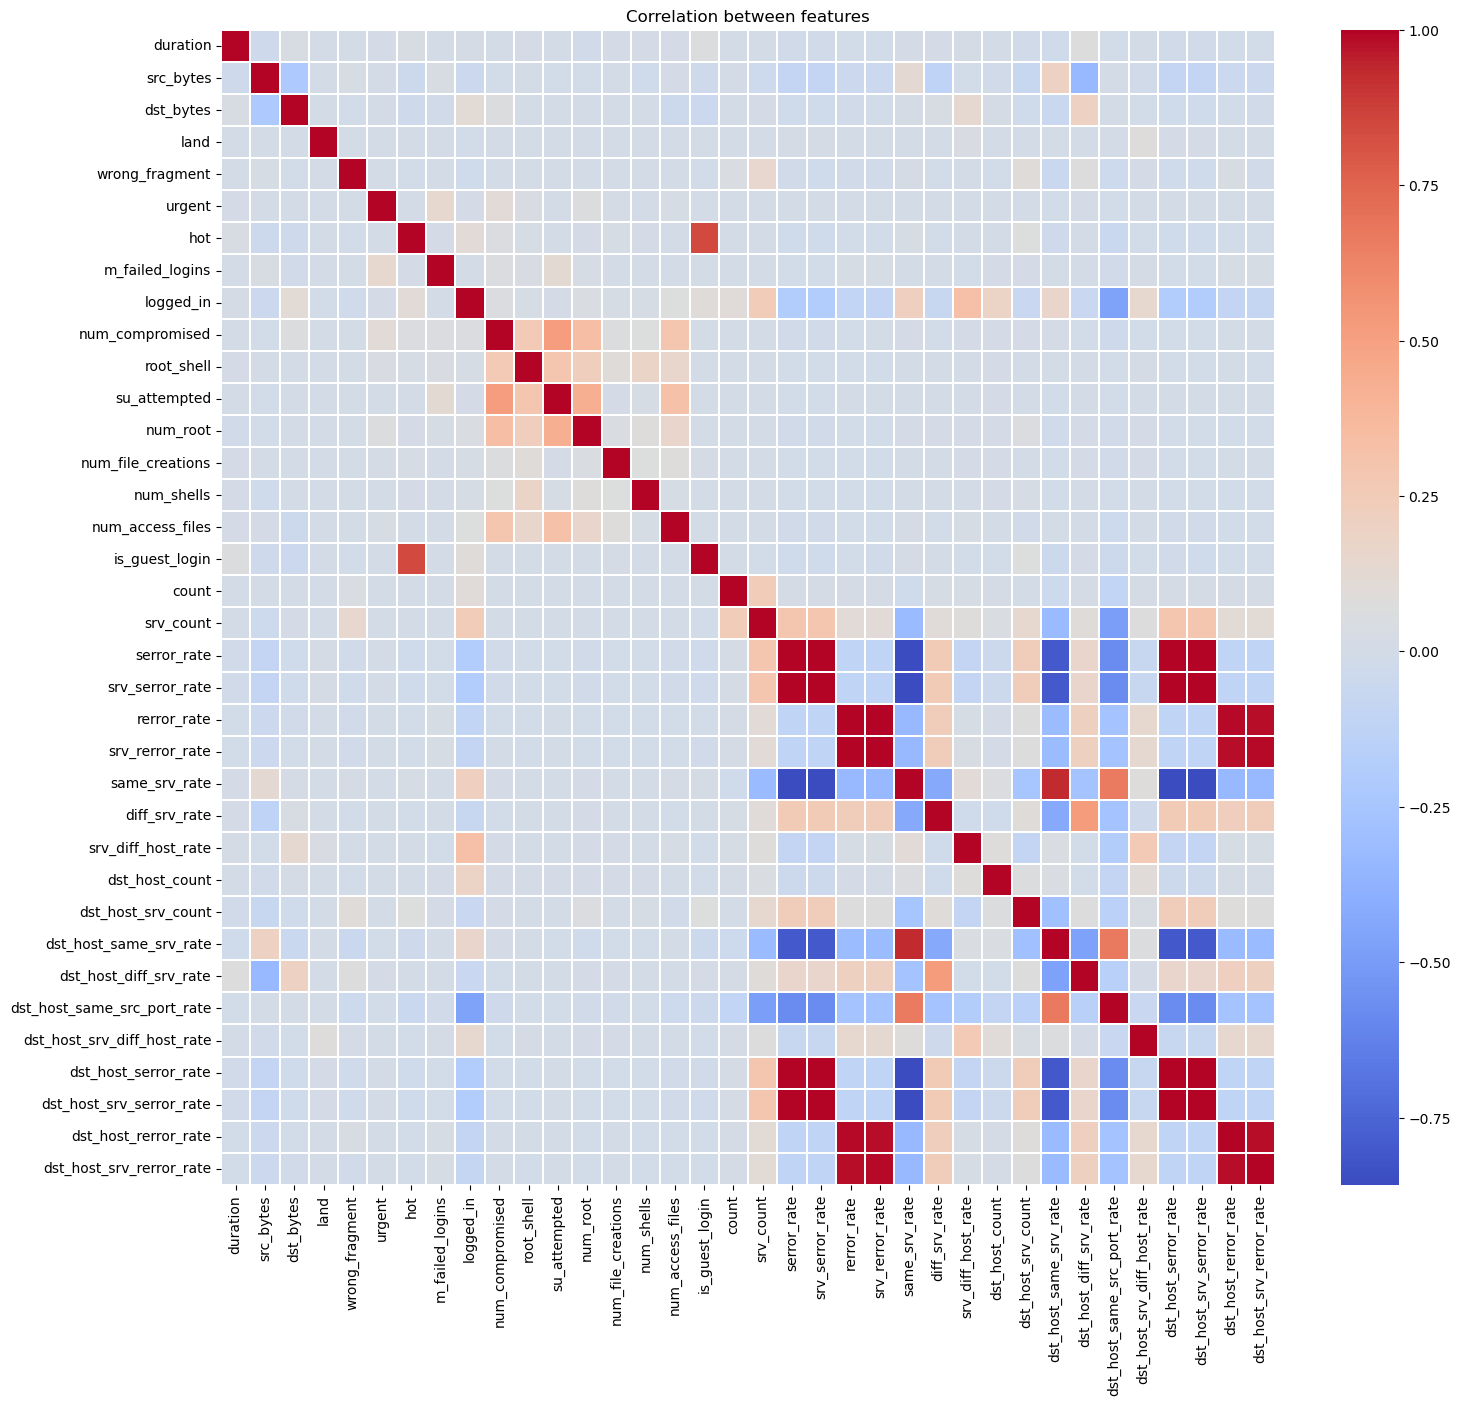

In [5]:
#Correlation Matrix using Heatmap
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()
print(df.shape)
fig, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(corr, cmap='coolwarm', ax=ax, linewidths=0.1)
plt.title("Correlation between features")
plt.show()

In [6]:
print(df.isnull().sum())
df

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
m_failed_logins                0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,-75,74,0,0,0,0,...,9,1.0,0.0,0.109985,0.000000,0.000000,0.000000,0.0,0.0,normal.
1,0,tcp,http,SF,-17,-26,0,0,0,0,...,19,1.0,0.0,0.049988,0.000000,0.000000,0.000000,0.0,0.0,normal.
2,0,tcp,http,SF,-21,57,0,0,0,0,...,29,1.0,0.0,0.029999,0.000000,0.000000,0.000000,0.0,0.0,normal.
3,0,tcp,http,SF,-37,57,0,0,0,0,...,39,1.0,0.0,0.029999,0.000000,0.000000,0.000000,0.0,0.0,normal.
4,0,tcp,http,SF,-39,-16,0,0,0,0,...,49,1.0,0.0,0.020004,0.000000,0.000000,0.000000,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,54,89,0,0,0,0,...,-1,1.0,0.0,0.010002,0.049988,0.000000,0.010002,0.0,0.0,normal.
494017,0,tcp,http,SF,26,-18,0,0,0,0,...,-1,1.0,0.0,0.170044,0.049988,0.000000,0.010002,0.0,0.0,normal.
494018,0,tcp,http,SF,-53,-80,0,0,0,0,...,-1,1.0,0.0,0.059998,0.049988,0.059998,0.010002,0.0,0.0,normal.
494019,0,tcp,http,SF,35,-80,0,0,0,0,...,-1,1.0,0.0,0.040009,0.049988,0.040009,0.010002,0.0,0.0,normal.


In [7]:
df.label=df.label.apply(lambda x: 0 if x == 'normal.' else 1)

C:\Users\karti\AppData\Local\Temp\ipykernel_33480\4274810740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label=df.label.apply(lambda x: 0 if x == 'normal.' else 1)


In [8]:
#convert categorical labels into numerical format
for column in df.columns:
    if df[column].dtype == np.object:
        encoded = LabelEncoder()
        
        encoded.fit(df[column])
        df[column] = encoded.transform(df[column])

C:\Users\karti\AppData\Local\Temp\ipykernel_33480\182166097.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:
C:\Users\karti\AppData\Local\Temp\ipykernel_33480\182166097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoded.transform(df[column])
C:\Users\karti\AppData\Local\Temp\ipykernel_33480\182166097.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself.

In [9]:
# Selecting 500 random samples with label 0
df_train = df[df.label == 0].sample(500)
df_train = df_train.drop('label', axis=1)

numeric_df_train = df_train.select_dtypes(include=['float16', 'int8'])
numeric_df = df.select_dtypes(include=['float16', 'int8'])

if not numeric_df.empty:
    # Scales numerical features
    scaler = StandardScaler()
    numeric_df_scaled_train = scaler.fit_transform(numeric_df_train)
    numeric_df_scaled = scaler.transform(numeric_df)
    
    # SVD
    n_components = 8  # Choose the number of components you want
    svd = TruncatedSVD(n_components=n_components, random_state=42)

    result_train = svd.fit_transform(numeric_df_scaled_train)
    result = svd.transform(numeric_df_scaled)

    print("Variance Ratio:", svd.explained_variance_ratio_)

    svd_df_train = pd.DataFrame(data=result_train, columns=[f'component_{i}' for i in range(n_components)])
    
    svd_df = pd.DataFrame(data=result, columns=[f'component_{i}' for i in range(n_components)])

    result_df = pd.concat([df.drop(columns=numeric_df.columns), svd_df], axis=1)

    print(result_df.head())
else:
    result_df = df.copy()

result_df.head()

Variance Ratio: [0.18111461 0.12782011 0.10717576 0.07359951 0.06121775 0.05484311
 0.05080323 0.04275174]
   protocol_type  service  flag  label  component_0  component_1  component_2  \
0              1       22     9      0    -0.745196    -0.128923    -0.040933   
1              1       22     9      0    -0.763631    -0.572887    -0.030784   
2              1       22     9      0    -0.776600    -0.423986    -0.081511   
3              1       22     9      0    -0.733324    -0.306844    -0.075567   
4              1       22     9      0    -0.718785    -0.433046    -0.044172   

   component_3  component_4  component_5  component_6  component_7  
0    -0.090084    -0.090322     0.681350     0.466242     0.506524  
1    -0.015082     0.167106    -0.001898     0.048865     0.798892  
2    -0.062639    -0.033724     0.337384     0.505406     0.625815  
3    -0.053542    -0.137810     0.273346     0.737296     0.905468  
4    -0.023769     0.008450     0.011573     0.684703     1.3

,protocol_type,service,flag,label,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7
0,1,22,9,0,-0.745196,-0.128923,-0.040933,-0.090084,-0.090322,0.681350,0.466242,0.506524
1,1,22,9,0,-0.763631,-0.572887,-0.030784,-0.015082,0.167106,-0.001898,0.048865,0.798892
2,1,22,9,0,-0.776600,-0.423986,-0.081511,-0.062639,-0.033724,0.337384,0.505406,0.625815
3,1,22,9,0,-0.733324,-0.306844,-0.075567,-0.053542,-0.137810,0.273346,0.737296,0.905468
4,1,22,9,0,-0.718785,-0.433046,-0.044172,-0.023769,0.008450,0.011573,0.684703,1.371058


In [11]:
#Generative Adversarial Network architecture
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))#16 units vector size 100
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    assert model.output_shape == (None, 16)
    model.add(layers.Reshape((1, 16)))

    model.add(layers.Dense(39))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(39))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(39))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Reshape((1, 39)))

    return model


In [12]:
#distinguishing between real and generated (fake) data
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(1, 39)))  # Flatten the input
    model.add(layers.Dense(16, use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1))

    return model


In [13]:
#Generating model
generator=make_generator_model()
discriminator=make_discriminator_model()

In [14]:
#Calculating loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [15]:
#Loss for the discriminator
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [16]:
#Calculates the binary cross-entropy loss
bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([1., 1., 1., 1.], [1., 1., 1., 1.])
print('Loss: ', loss.numpy())

Loss:  0.0


In [17]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [18]:
#Adaptive Moment Estimation(Adam) Optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [19]:
EPOCHS = 500 #times the entire training dataset is passed 
noise_dim = 100 #random noise vector
BATCH_SIZE = 64 #number of samples used in each iteration

In [20]:
#raining step for a GAN
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images = tf.expand_dims(images, axis=0)  # Add batch dimension
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
     
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_loss, disc_loss)


In [22]:
#Traning of data
x_train = df_train.values
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1])).astype('float32')
#Performs a training step for each epochs
history=dict()
history['gen']=[] #Store generator loss
history['dis']=[] #Store discriminator loss
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

            gen_loss,dis_loss= train_step(batch)
            history['gen'].append(gen_loss)
            history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))
train(x_train, EPOCHS)

Time for epoch 1 is 13.532398223876953 sec 
Time for epoch 2 is 3.4542593955993652 sec 
Time for epoch 3 is 3.4846746921539307 sec 
Time for epoch 4 is 3.520016670227051 sec 
Time for epoch 5 is 3.5162153244018555 sec 
Time for epoch 6 is 3.4889698028564453 sec 
Time for epoch 7 is 3.412745714187622 sec 
Time for epoch 8 is 3.5136537551879883 sec 
Time for epoch 9 is 3.51496958732605 sec 
Time for epoch 10 is 3.488368034362793 sec 
Time for epoch 11 is 3.780122995376587 sec 
Time for epoch 12 is 3.4464571475982666 sec 
Time for epoch 13 is 3.2347404956817627 sec 
Time for epoch 14 is 3.241577625274658 sec 
Time for epoch 15 is 3.2692036628723145 sec 
Time for epoch 16 is 3.266655921936035 sec 
Time for epoch 17 is 3.23157000541687 sec 
Time for epoch 18 is 3.1428136825561523 sec 
Time for epoch 19 is 2.946207046508789 sec 
Time for epoch 20 is 3.3334028720855713 sec 
Time for epoch 21 is 3.360152006149292 sec 
Time for epoch 22 is 3.167633295059204 sec 
Time for epoch 23 is 2.915501117

Time for epoch 184 is 2.641547679901123 sec 
Time for epoch 185 is 2.6958467960357666 sec 
Time for epoch 186 is 2.6442856788635254 sec 
Time for epoch 187 is 2.649778366088867 sec 
Time for epoch 188 is 2.508697032928467 sec 
Time for epoch 189 is 2.7543420791625977 sec 
Time for epoch 190 is 3.197812080383301 sec 
Time for epoch 191 is 3.3087499141693115 sec 
Time for epoch 192 is 3.3740062713623047 sec 
Time for epoch 193 is 3.39833927154541 sec 
Time for epoch 194 is 3.2658984661102295 sec 
Time for epoch 195 is 3.293898582458496 sec 
Time for epoch 196 is 3.3173906803131104 sec 
Time for epoch 197 is 3.4667108058929443 sec 
Time for epoch 198 is 3.4680755138397217 sec 
Time for epoch 199 is 3.4993371963500977 sec 
Time for epoch 200 is 3.5718154907226562 sec 
Time for epoch 201 is 3.5641233921051025 sec 
Time for epoch 202 is 3.5233163833618164 sec 
Time for epoch 203 is 3.1489713191986084 sec 
Time for epoch 204 is 2.9778330326080322 sec 
Time for epoch 205 is 3.190657138824463 s

Time for epoch 365 is 3.5356335639953613 sec 
Time for epoch 366 is 3.543830633163452 sec 
Time for epoch 367 is 3.6009745597839355 sec 
Time for epoch 368 is 3.521097183227539 sec 
Time for epoch 369 is 3.5779526233673096 sec 
Time for epoch 370 is 3.501739501953125 sec 
Time for epoch 371 is 3.592714786529541 sec 
Time for epoch 372 is 3.4366989135742188 sec 
Time for epoch 373 is 3.558992862701416 sec 
Time for epoch 374 is 3.5237252712249756 sec 
Time for epoch 375 is 3.4660816192626953 sec 
Time for epoch 376 is 3.429516553878784 sec 
Time for epoch 377 is 3.5029637813568115 sec 
Time for epoch 378 is 3.6116135120391846 sec 
Time for epoch 379 is 3.5603220462799072 sec 
Time for epoch 380 is 3.559757947921753 sec 
Time for epoch 381 is 3.534285068511963 sec 
Time for epoch 382 is 3.560490131378174 sec 
Time for epoch 383 is 3.579085111618042 sec 
Time for epoch 384 is 3.561936378479004 sec 
Time for epoch 385 is 3.555809497833252 sec 
Time for epoch 386 is 3.5396413803100586 sec 


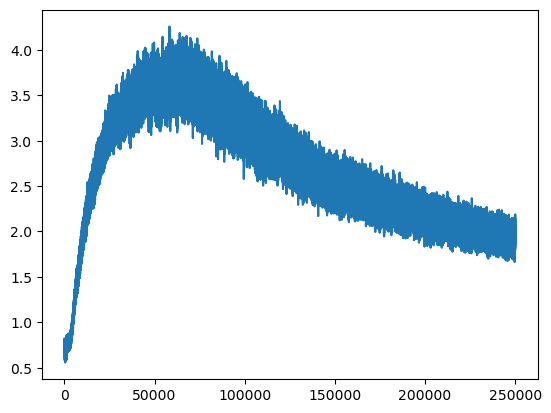

In [23]:
plt.plot(history['gen'])

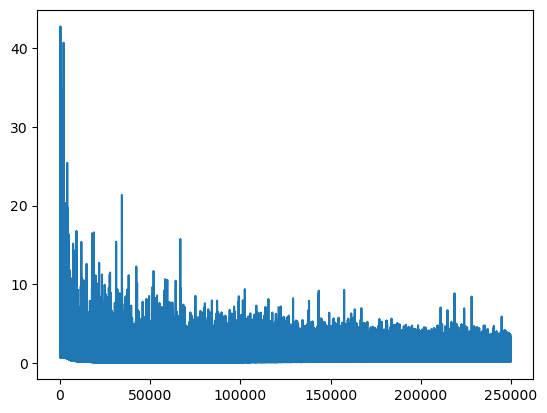

In [24]:
plt.plot(history['dis'])

In [25]:
print(df.drop('label', axis=1).values.shape)

(494021, 39)


In [26]:
x_test = df.drop('label', axis=1).values

#Reshape the data
x_test_reshaped = x_test.reshape(-1, 1, 39)
#Prediction
y_pred = discriminator.predict(x_test_reshaped)


15439/15439 [==============================] - 52s 3ms/step


Text(0, 0.5, 'y_pred')

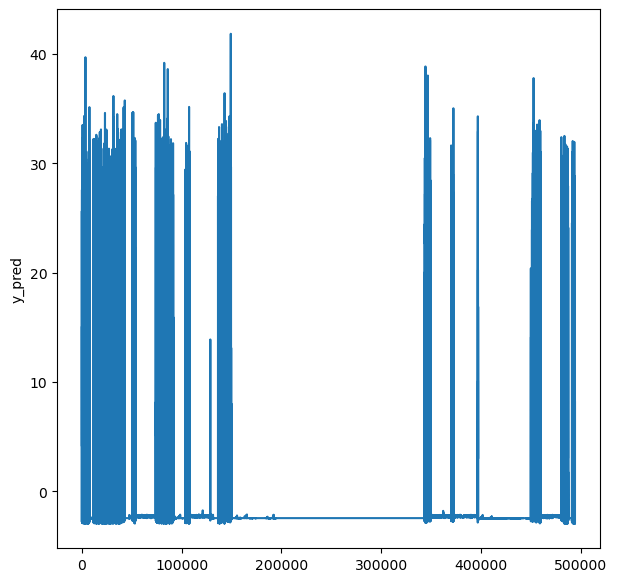

In [27]:
#range of output value
plt.figure(figsize=(7,7))
plt.plot(range(len(y_pred)),y_pred.reshape(-1,1))
plt.ylabel('y_pred')

In [31]:
#optimal probability threshold
# Assuming your labels are stored in the 'label' column of your DataFrame
y_test = df['label'].apply(lambda x: 0 if x == 'normal.' else 1).values
prob=[-0.2,-0.1,-0.05,0,0.005,0.1]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

prob =-0.2 and f1 score =0.9191201486912393 : accuracy=0.8503444185571059 : precision=1.0 : recall=0.8503444185571059
73933 420088
prob =-0.1 and f1 score =0.9198480417611851 : accuracy=0.8515913291135397 : precision=1.0 : recall=0.8515913291135397
73317 420704
prob =-0.05 and f1 score =0.92024230131609 : accuracy=0.8522674137334243 : precision=1.0 : recall=0.8522674137334243
72983 421038
prob =0 and f1 score =0.9205950021740128 : accuracy=0.8528726511626024 : precision=1.0 : recall=0.8528726511626024
72684 421337
prob =0.005 and f1 score =0.9206539597643892 : accuracy=0.8529738614350402 : precision=1.0 : recall=0.8529738614350402
72634 421387
prob =0.1 and f1 score =0.9230351677290524 : accuracy=0.8570708532633228 : precision=1.0 : recall=0.8570708532633228
70610 423411
